In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (11.5, 8.5)

### Point wise

In [3]:
events_data = pd.read_csv('movie_events_linear.csv')
events_data.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Thriller,War,Western,price,ratings_average,ratings_count,release_date,unknown,outcome,user_id
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.283637,0.169532,-0.142869,0.393978,0.0,0,534
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.283637,-0.097012,-0.715191,0.393978,0.0,1,686
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,-0.777083,-1.056570,-0.690307,0.253620,0.0,1,532
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.246723,-0.416864,-0.690307,0.393978,0.0,1,624
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.344357,1.138281,-0.379263,0.464156,0.0,0,577


In [4]:
events_data.columns

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'price',
       'ratings_average', 'ratings_count', 'release_date', 'unknown',
       'outcome', 'user_id'],
      dtype='object')

## Задание 0

Посчитайте число уникальных пользователей и среднее число фильмов на каждого в датасете

In [15]:
# YOUR CODE HERE
print('Уникальных пользователей:', len(events_data['user_id'].unique()))
print('Серднее число фильмов на пользователя:', events_data.shape[0]/len(events_data['user_id'].unique()))
n_users = np.unique(events_data['user_id']).shape[0]
films_per_user = events_data.shape[0]/n_users
n_users, films_per_user

Уникальных пользователей: 999
Серднее число фильмов на пользователя: 20.0


(999, 20.0)

## Задание 1

Разбейте выборку на train и test. Важно, чтобы все пользователи попали в трейн и тест.

In [16]:
# YOUR CODE HERE
X = events_data.drop('outcome', axis=1)
y = events_data['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=events_data['user_id'])

## Задание 2

Закодируйте признак `user_id` с помощью OHE.

Используйте `ColumnTransformer`.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
# YOUR CODE HERE
column_transformer = ColumnTransformer([
    ('user encoder', OneHotEncoder(), ['user_id'])
    ], remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [22]:
column_transformer.get_feature_names()

['user encoder__x0_1',
 'user encoder__x0_2',
 'user encoder__x0_3',
 'user encoder__x0_4',
 'user encoder__x0_5',
 'user encoder__x0_6',
 'user encoder__x0_7',
 'user encoder__x0_8',
 'user encoder__x0_9',
 'user encoder__x0_10',
 'user encoder__x0_11',
 'user encoder__x0_12',
 'user encoder__x0_13',
 'user encoder__x0_14',
 'user encoder__x0_15',
 'user encoder__x0_16',
 'user encoder__x0_17',
 'user encoder__x0_18',
 'user encoder__x0_19',
 'user encoder__x0_20',
 'user encoder__x0_21',
 'user encoder__x0_22',
 'user encoder__x0_23',
 'user encoder__x0_24',
 'user encoder__x0_25',
 'user encoder__x0_26',
 'user encoder__x0_27',
 'user encoder__x0_28',
 'user encoder__x0_29',
 'user encoder__x0_30',
 'user encoder__x0_31',
 'user encoder__x0_32',
 'user encoder__x0_33',
 'user encoder__x0_34',
 'user encoder__x0_35',
 'user encoder__x0_36',
 'user encoder__x0_37',
 'user encoder__x0_38',
 'user encoder__x0_39',
 'user encoder__x0_40',
 'user encoder__x0_41',
 'user encoder__x0_42',
 

## Задание 3

Обучите логистическую регрессию.

In [24]:
from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Задание 4

Сделайте предсказание для теста, измерьте качество с помощью Precision. 

In [25]:
from sklearn.metrics import precision_score

# YOUR CODE HERE
y_pred = lr.predict(X_test)
precision_score(y_test, y_pred)

0.676329862088376

## Задание 5

Просчитайте precision для каждого пользователя отдельно и усредните

In [31]:
# YOUR CODE HERE
pr = []

for i in range(n_users):
    ids = np.where(X_test.toarray()[:,i] == 1)[0]
    y_test_current = y_test.values[ids]
    y_pred_current = y_pred[ids]
    pr.append(precision_score(y_test_current, y_pred_current, zero_division=0))

In [32]:
np.mean(pr)

0.6736236236236236

## Задание 6

Для каждого пользователя выберете 3 самых 'уверенных' прогноза модели и посчитайте pr@3.

Вам пригодятся функции `np.where` и `np.argsort`

In [34]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]

In [38]:
# YOUR CODE HERE
pr_t3 = []

for i in range(n_users):
    ids = np.where(X_test.toarray()[:,i] == 1)[0]
    
    ps = y_pred_proba[ids]
    confident_ids = ids[np.argsort(ps)[-3:]]
    
    y_test_confident = y_test.values[confident_ids]
    y_pred_confident = y_pred[confident_ids]
    
    pr_t3.append(precision_score(y_test_confident, y_pred_confident, zero_division=0))

In [39]:
np.mean(pr_t3)

0.71338004671338

---

# Pair wise

Используем данные о парах фильмах. Значение 1 целевой переменной означает, что был выбран фильм 1, а 0 - что фильм 2.

In [40]:
events_data = pd.read_csv('movie_events_pairwise-linear.csv')

In [41]:
events_data.head()

,Action_1,Adventure_1,Animation_1,Children's_1,Comedy_1,Crime_1,Documentary_1,Drama_1,Fantasy_1,Film-Noir_1,...,Thriller_2,War_2,Western_2,price_2,ratings_average_2,ratings_count_2,release_date_2,unknown_2,outcome,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.283637,-0.325478,-0.391705,0.604514,0.0,0.0,517.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.813997,0.268534,-0.478797,0.464156,0.0,1.0,155.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.777083,-0.378482,-0.117986,-1.430668,0.0,0.0,559.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.283637,0.060890,3.191525,0.534335,0.0,0.0,707.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-2.368163,-2.655833,-0.727633,0.464156,0.0,0.0,73.0


In [42]:
events_data.columns

Index(['Action_1', 'Adventure_1', 'Animation_1', 'Children's_1', 'Comedy_1',
       'Crime_1', 'Documentary_1', 'Drama_1', 'Fantasy_1', 'Film-Noir_1',
       'Horror_1', 'Musical_1', 'Mystery_1', 'Romance_1', 'Sci-Fi_1',
       'Thriller_1', 'War_1', 'Western_1', 'price_1', 'ratings_average_1',
       'ratings_count_1', 'release_date_1', 'unknown_1', 'Action_2',
       'Adventure_2', 'Animation_2', 'Children's_2', 'Comedy_2', 'Crime_2',
       'Documentary_2', 'Drama_2', 'Fantasy_2', 'Film-Noir_2', 'Horror_2',
       'Musical_2', 'Mystery_2', 'Romance_2', 'Sci-Fi_2', 'Thriller_2',
       'War_2', 'Western_2', 'price_2', 'ratings_average_2', 'ratings_count_2',
       'release_date_2', 'unknown_2', 'outcome', 'user_id'],
      dtype='object')

In [43]:
events_data.shape

(130236, 48)

In [44]:
events_data['outcome'].value_counts()

1.0    65118
0.0    65118
Name: outcome, dtype: int64

In [45]:
print(np.unique(events_data['user_id']).shape)

print(events_data.shape[0]/np.unique(events_data['user_id']).shape[0])

(999,)
130.36636636636638


## Задание 7

Разбейте выборку на train и test, закодируйте переменную user_id.

In [46]:
# YOUR CODE HERE
X = events_data.drop('outcome', axis=1)
y = events_data['outcome']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=events_data['user_id'])

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91165, 47), (39071, 47), (91165,), (39071,))

In [49]:
# YOUR CODE HERE
column_transformer = ColumnTransformer([
    ('user encoder', OneHotEncoder(), ['user_id'])
    ], remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

## Задание 8

Обучите логистическую регрессию.

In [50]:
# YOUR CODE HERE
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Задание 9

Сделайте предсказание для теста, измерьте качество с помощью метрик из предыдущей части. Сравните результат.

In [51]:
# YOUR CODE HERE
y_pred = lr.predict(X_test)
precision_score(y_test, y_pred)

0.7070396557024285

In [52]:
# YOUR CODE HERE
pr = []

for i in range(n_users):
    ids = np.where(X_test.toarray()[:,i] == 1)[0]
    y_test_current = y_test.values[ids]
    y_pred_current = y_pred[ids]
    pr.append(precision_score(y_test_current, y_pred_current, zero_division=0))

np.mean(pr)

0.7131292715550298

In [53]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]

In [54]:
# YOUR CODE HERE
pr_t3 = []

for i in range(n_users):
    ids = np.where(X_test.toarray()[:,i] == 1)[0]
    
    ps = y_pred_proba[ids]
    confident_ids = ids[np.argsort(ps)[-3:]]
    
    y_test_confident = y_test.values[confident_ids]
    y_pred_confident = y_pred[confident_ids]
    
    pr_t3.append(precision_score(y_test_confident, y_pred_confident, zero_division=0))

In [55]:
np.mean(pr_t3)

0.8698698698698699

## Задание 10

Выведите важности признаков (`model0.coef_`)

In [ ]:
column_transformer.get_feature_names()

In [56]:
feature_importances = pd.DataFrame({'feature': column_transformer.get_feature_names(),
                                   'importance': lr.coef_[0]}
                                )
feature_importances

,feature,importance
0,user encoder__x0_1.0,0.035905
1,user encoder__x0_2.0,-0.236668
2,user encoder__x0_3.0,-0.010984
3,user encoder__x0_4.0,-0.053927
4,user encoder__x0_5.0,0.239263
...,...,...
1040,price_2,0.615564
1041,ratings_average_2,0.367395
1042,ratings_count_2,-0.070295
1043,release_date_2,0.266009


In [57]:
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances.iloc[:10]

,feature,importance
1021,unknown_1,0.952796
10,user encoder__x0_11.0,0.616343
1040,price_2,0.615564
878,user encoder__x0_879.0,0.443064
858,user encoder__x0_859.0,0.416927
314,user encoder__x0_315.0,0.414334
212,user encoder__x0_213.0,0.413726
633,user encoder__x0_634.0,0.371813
1041,ratings_average_2,0.367395
391,user encoder__x0_392.0,0.365812


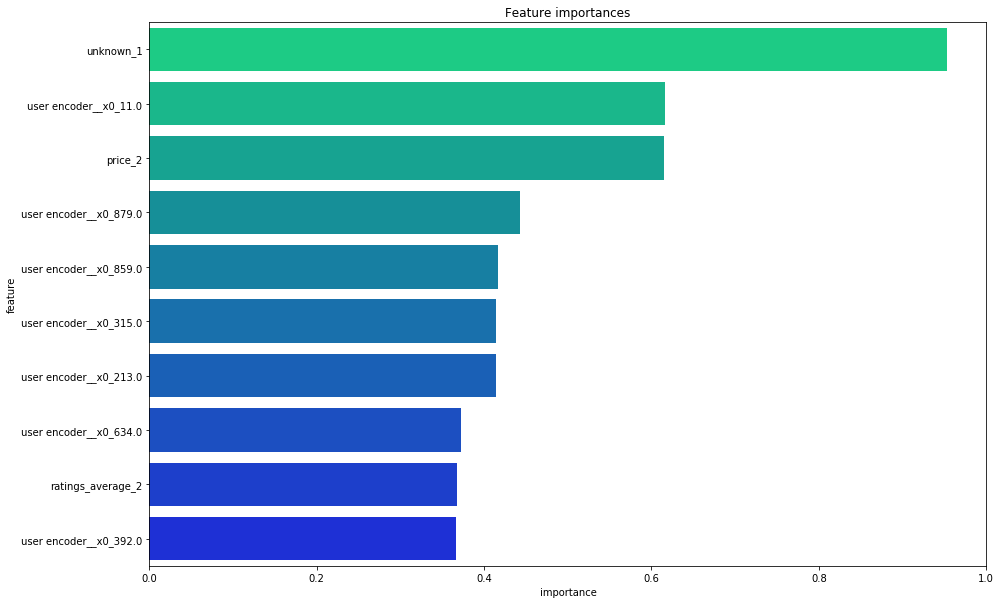

In [58]:
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importances[:10], x='importance', y='feature', palette="winter_r")
plt.title('Feature importances')
plt.show()

## Задание 11

Проделайте то же самое, но со случайным лесом.

In [60]:
# your code here
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = rf.predict(X_test)
precision_score(y_test, y_pred)

0.9464119772844605

In [63]:
pr = []

for i in range(n_users):
    ids = np.where(X_test.toarray()[:,i] == 1)[0]
    y_test_current = y_test.values[ids]
    y_pred_current = y_pred[ids]
    pr.append(precision_score(y_test_current, y_pred_current, zero_division=0))

np.mean(pr)

0.9401696328301598

In [65]:
feature_importances = pd.DataFrame({'feature': column_transformer.get_feature_names(),
                                   'importance': rf.feature_importances_}
                                )
feature_importances

,feature,importance
0,user encoder__x0_1.0,0.000641
1,user encoder__x0_2.0,0.000293
2,user encoder__x0_3.0,0.000476
3,user encoder__x0_4.0,0.000452
4,user encoder__x0_5.0,0.000139
...,...,...
1040,price_2,0.071340
1041,ratings_average_2,0.084631
1042,ratings_count_2,0.049745
1043,release_date_2,0.048103


In [66]:
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances.iloc[:10]

,feature,importance
1041,ratings_average_2,0.084631
1018,ratings_average_1,0.082464
1017,price_1,0.072251
1040,price_2,0.071340
1019,ratings_count_1,0.050771
1042,ratings_count_2,0.049745
1043,release_date_2,0.048103
1020,release_date_1,0.046666
1029,Drama_2,0.008455
1006,Drama_1,0.008108


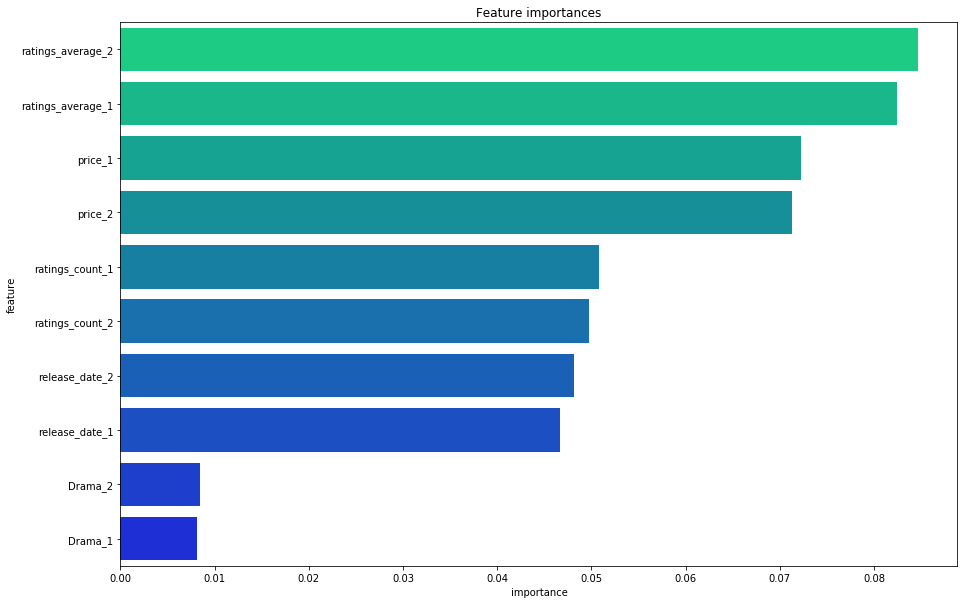

In [67]:
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importances[:10], x='importance', y='feature', palette="winter_r")
plt.title('Feature importances')
plt.show()

In [70]:
useful_features = []
for c in feature_importances['feature']:
    if not 'user' in c:
        useful_features.append(c)
useful_features

['ratings_average_2',
 'ratings_average_1',
 'price_1',
 'price_2',
 'ratings_count_1',
 'ratings_count_2',
 'release_date_2',
 'release_date_1',
 'Drama_2',
 'Drama_1',
 'Comedy_1',
 'Comedy_2',
 'Romance_1',
 'Romance_2',
 'Action_1',
 'Thriller_2',
 'Thriller_1',
 'Action_2',
 'Crime_2',
 'Crime_1',
 'Adventure_2',
 'Adventure_1',
 'Sci-Fi_2',
 'Sci-Fi_1',
 "Children's_2",
 "Children's_1",
 'War_1',
 'War_2',
 'Horror_1',
 'Horror_2',
 'Mystery_1',
 'Mystery_2',
 'Musical_1',
 'Musical_2',
 'Documentary_1',
 'Documentary_2',
 'Animation_2',
 'Animation_1',
 'Western_1',
 'Western_2',
 'Fantasy_2',
 'Fantasy_1',
 'Film-Noir_1',
 'Film-Noir_2',
 'unknown_1',
 'unknown_2']

In [90]:
feature_imp = feature_importances.loc[feature_importances['feature'].isin(useful_features)]

In [91]:
feature_imp = feature_importances.sort_values('importance', ascending=False)
feature_imp.iloc[:10]

,feature,importance
1041,ratings_average_2,0.084631
1018,ratings_average_1,0.082464
1017,price_1,0.072251
1040,price_2,0.071340
1019,ratings_count_1,0.050771
1042,ratings_count_2,0.049745
1043,release_date_2,0.048103
1020,release_date_1,0.046666
1029,Drama_2,0.008455
1006,Drama_1,0.008108


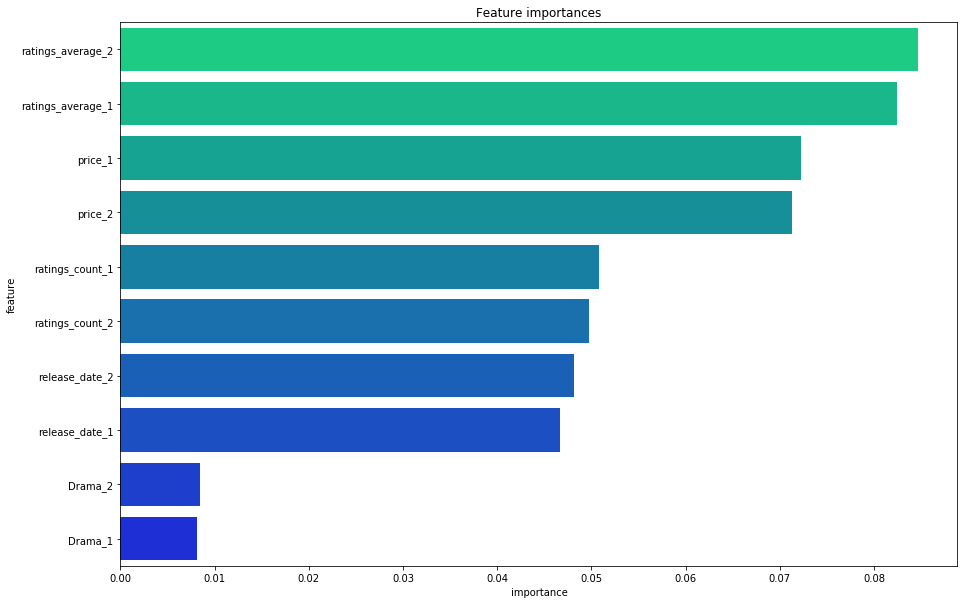

In [92]:
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_imp[:10], x='importance', y='feature', palette="winter_r")
plt.title('Feature importances')
plt.show()

## Задание 12

Проделайте то же самое, но с градиентным бустингом.

In [ ]:
# your code here